# JTrading News Manager - Test Notebook

This notebook provides comprehensive testing and exploration of the JTrading News Manager components:

- **Symbol Mapper**: Currency to trading pairs mapping
- **CSV Exporter**: Economic events data export functionality  
- **Scraper**: ForexFactory economic calendar scraping
- **Data Exploration**: Analysis and visualization of scraped data

## Usage

Run cells sequentially to test each component. The notebook includes both unit tests and interactive data exploration.


## 1. Setup & Imports

First, we'll set up the environment and import all necessary modules.


In [2]:
# Add project root to Python path for imports
import sys
import os

# Get the current notebook directory (test/)
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
# Go up one level to get project root
project_root = os.path.dirname(notebook_dir)
# Add src directory to path
src_path = os.path.join(project_root, 'src')
sys.path.insert(0, src_path)

print(f"Project root: {project_root}")
print(f"Source path: {src_path}")
print(f"Python path updated successfully")


Project root: d:\WORK\JTrading\JTrading-News-Manager
Source path: d:\WORK\JTrading\JTrading-News-Manager\src
Python path updated successfully


In [4]:
# Import core modules
import json
import logging
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from typing import List, Dict, Optional
import warnings

# Import project modules
from scraper import ForexFactoryScraper
from symbol_mapper import SymbolMapper
from csv_exporter import CSVExporter

# Import visualization libraries (install with: pip install matplotlib seaborn)
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from IPython.display import display, HTML
    VISUALIZATION_AVAILABLE = True
except ImportError as e:
    print(f"⚠️  Visualization libraries not available: {e}")
    print("💡 Install with: pip install matplotlib seaborn")
    VISUALIZATION_AVAILABLE = False

# Configure matplotlib for inline display (if available)
if VISUALIZATION_AVAILABLE:
    %matplotlib inline
    plt.style.use('default')
    sns.set_palette("husl")

# Configure logging to display in notebook
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler()]
)

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("✅ All modules imported successfully")
print("📊 Visualization libraries ready")
print("🔧 Logging configured for notebook display")


✅ All modules imported successfully
📊 Visualization libraries ready
🔧 Logging configured for notebook display


## 2. Configuration Testing

Let's load and examine the configuration file to understand the project settings.


In [5]:
# Load configuration
config_path = os.path.join(project_root, 'config', 'config.json')

try:
    with open(config_path, 'r') as f:
        config = json.load(f)
    
    print("✅ Configuration loaded successfully")
    print(f"📁 Config file: {config_path}")
    
    # Display configuration sections
    print("\n📋 Configuration Sections:")
    for section, data in config.items():
        print(f"  • {section}: {len(data)} items")
        
    # Display full config in a nice format
    print("\n🔧 Full Configuration:")
    display(HTML(f"<pre>{json.dumps(config, indent=2)}</pre>"))
    
except FileNotFoundError:
    print(f"❌ Config file not found: {config_path}")
    config = None
except json.JSONDecodeError as e:
    print(f"❌ Invalid JSON in config file: {e}")
    config = None


✅ Configuration loaded successfully
📁 Config file: d:\WORK\JTrading\JTrading-News-Manager\config\config.json

📋 Configuration Sections:
  • scraping: 7 items
  • scheduler: 2 items
  • output: 1 items
  • symbol_mapping: 2 items
  • logging: 3 items

🔧 Full Configuration:


## 3. Symbol Mapper Tests

Test the SymbolMapper functionality for currency to trading pairs mapping.


In [7]:
# Initialize Symbol Mapper
symbol_mapper = SymbolMapper()

print("✅ Symbol Mapper initialized")
print(f"📁 Config path: {symbol_mapper.config_path}")

# Get available currencies
available_currencies = symbol_mapper.get_available_currencies()
print(f"💱 Available currencies: {len(available_currencies)}")
print(f"   {', '.join(available_currencies)}")

# Get all mappings
all_mappings = symbol_mapper.get_all_mappings()
print(f"\n📊 Total currency mappings: {len(all_mappings)}")

# Display mappings in a nice format
mapping_df = pd.DataFrame([
    {'Currency': currency, 'Trading_Pairs': ', '.join(pairs), 'Count': len(pairs)}
    for currency, pairs in all_mappings.items()
])

print("\n📋 Currency Mappings:")
display(mapping_df)


2025-10-23 23:37:52,055 - symbol_mapper - ERROR - Config file not found: config/config.json
2025-10-23 23:37:52,055 - symbol_mapper - WARNING - Using default mappings due to config error


✅ Symbol Mapper initialized
📁 Config path: config/config.json
💱 Available currencies: 8
   AUD, CAD, CHF, EUR, GBP, JPY, NZD, USD

📊 Total currency mappings: 8

📋 Currency Mappings:


,Currency,Trading_Pairs,Count
0,USD,"EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD...",7
1,EUR,"EURUSD, EURGBP, EURJPY, EURCHF, EURAUD",5
2,GBP,"GBPUSD, EURGBP, GBPJPY, GBPCHF, GBPAUD",5
3,JPY,"USDJPY, EURJPY, GBPJPY, AUDJPY, NZDJPY",5
4,CHF,"USDCHF, EURCHF, GBPCHF, CHFJPY",4
5,AUD,"AUDUSD, EURAUD, GBPAUD, AUDJPY, AUDNZD",5
6,NZD,"NZDUSD, NZDJPY, AUDNZD",3
7,CAD,"USDCAD, CADJPY",2


In [8]:
# Test get_affected_pairs for each currency
print("🧪 Testing get_affected_pairs() for each currency:")
print("=" * 60)

test_results = []
for currency in available_currencies:
    pairs = symbol_mapper.get_affected_pairs(currency)
    test_results.append({
        'Currency': currency,
        'Pairs': pairs,
        'Count': len(pairs)
    })
    print(f"{currency:3s}: {len(pairs):2d} pairs - {', '.join(pairs[:3])}{'...' if len(pairs) > 3 else ''}")

# Create DataFrame for visualization
test_df = pd.DataFrame(test_results)

print(f"\n📊 Summary:")
print(f"   Total currencies tested: {len(test_results)}")
print(f"   Average pairs per currency: {test_df['Count'].mean():.1f}")
print(f"   Max pairs for a currency: {test_df['Count'].max()}")
print(f"   Min pairs for a currency: {test_df['Count'].min()}")


🧪 Testing get_affected_pairs() for each currency:
AUD:  5 pairs - AUDUSD, EURAUD, GBPAUD...
CAD:  2 pairs - USDCAD, CADJPY
CHF:  4 pairs - USDCHF, EURCHF, GBPCHF...
EUR:  5 pairs - EURUSD, EURGBP, EURJPY...
GBP:  5 pairs - GBPUSD, EURGBP, GBPJPY...
JPY:  5 pairs - USDJPY, EURJPY, GBPJPY...
NZD:  3 pairs - NZDUSD, NZDJPY, AUDNZD
USD:  7 pairs - EURUSD, GBPUSD, USDJPY...

📊 Summary:
   Total currencies tested: 8
   Average pairs per currency: 4.5
   Max pairs for a currency: 7
   Min pairs for a currency: 2


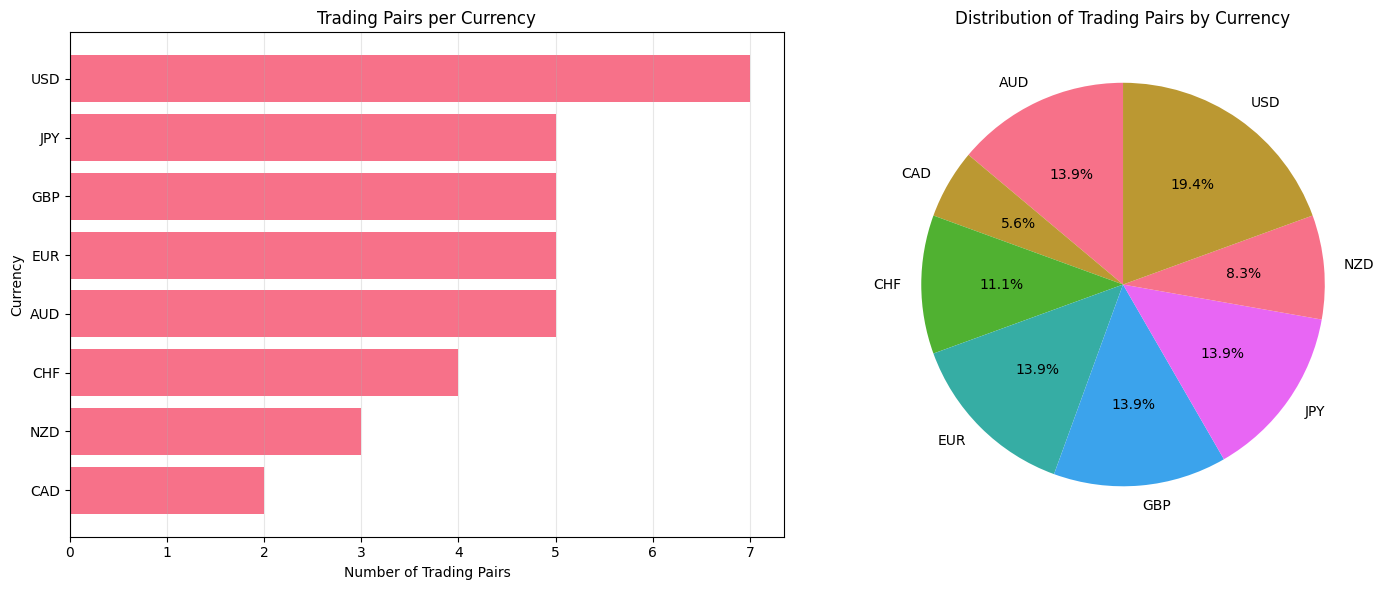

📈 Visualization complete


In [9]:
# Visualize currency mapping statistics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart of pairs per currency
test_df_sorted = test_df.sort_values('Count', ascending=True)
ax1.barh(test_df_sorted['Currency'], test_df_sorted['Count'])
ax1.set_xlabel('Number of Trading Pairs')
ax1.set_ylabel('Currency')
ax1.set_title('Trading Pairs per Currency')
ax1.grid(axis='x', alpha=0.3)

# Pie chart of total pairs distribution
currency_counts = test_df.set_index('Currency')['Count']
ax2.pie(currency_counts.values, labels=currency_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribution of Trading Pairs by Currency')

plt.tight_layout()
plt.show()

print("📈 Visualization complete")


In [10]:
# Test map_events_to_pairs with sample events
print("🧪 Testing map_events_to_pairs() with sample data:")
print("=" * 60)

# Create sample events
sample_events = [
    {
        'DateTime': '2024-01-15 14:30:00',
        'Event': 'Non-Farm Payrolls',
        'Country': 'United States',
        'Impact': 'High',
        'Currency': 'USD',
        'Actual': '200K',
        'Forecast': '180K',
        'Previous': '150K'
    },
    {
        'DateTime': '2024-01-15 10:00:00',
        'Event': 'GDP Growth Rate',
        'Country': 'Eurozone',
        'Impact': 'Medium',
        'Currency': 'EUR',
        'Actual': '0.3%',
        'Forecast': '0.2%',
        'Previous': '0.1%'
    },
    {
        'DateTime': '2024-01-15 08:30:00',
        'Event': 'Inflation Rate',
        'Country': 'United Kingdom',
        'Impact': 'High',
        'Currency': 'GBP',
        'Actual': '2.1%',
        'Forecast': '2.0%',
        'Previous': '1.9%'
    },
    {
        'DateTime': '2024-01-15 12:00:00',
        'Event': 'Interest Rate Decision',
        'Country': 'Japan',
        'Impact': 'High',
        'Currency': 'JPY',
        'Actual': '-0.1%',
        'Forecast': '-0.1%',
        'Previous': '-0.1%'
    }
]

print(f"📝 Sample events created: {len(sample_events)}")
for i, event in enumerate(sample_events, 1):
    print(f"   {i}. {event['Event']} ({event['Currency']}) - {event['Impact']} Impact")

# Map events to trading pairs
mapped_events = symbol_mapper.map_events_to_pairs(sample_events)

print(f"\n✅ Events mapped successfully: {len(mapped_events)}")
print("\n📋 Mapped Events with Trading Pairs:")
for event in mapped_events:
    print(f"   {event['Event']} ({event['Currency']}): {event['AffectedPairs']}")

# Display as DataFrame
mapped_df = pd.DataFrame(mapped_events)
print(f"\n📊 Mapped Events DataFrame:")
display(mapped_df[['Event', 'Currency', 'Impact', 'AffectedPairs']])


2025-10-23 23:38:38,825 - symbol_mapper - INFO - Mapped 4 events with trading pairs


🧪 Testing map_events_to_pairs() with sample data:
📝 Sample events created: 4
   1. Non-Farm Payrolls (USD) - High Impact
   2. GDP Growth Rate (EUR) - Medium Impact
   3. Inflation Rate (GBP) - High Impact
   4. Interest Rate Decision (JPY) - High Impact

✅ Events mapped successfully: 4

📋 Mapped Events with Trading Pairs:
   Non-Farm Payrolls (USD): EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD, USDCAD
   GDP Growth Rate (EUR): EURUSD, EURGBP, EURJPY, EURCHF, EURAUD
   Inflation Rate (GBP): GBPUSD, EURGBP, GBPJPY, GBPCHF, GBPAUD
   Interest Rate Decision (JPY): USDJPY, EURJPY, GBPJPY, AUDJPY, NZDJPY

📊 Mapped Events DataFrame:


,Event,Currency,Impact,AffectedPairs
0,Non-Farm Payrolls,USD,High,"EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD..."
1,GDP Growth Rate,EUR,Medium,"EURUSD, EURGBP, EURJPY, EURCHF, EURAUD"
2,Inflation Rate,GBP,High,"GBPUSD, EURGBP, GBPJPY, GBPCHF, GBPAUD"
3,Interest Rate Decision,JPY,High,"USDJPY, EURJPY, GBPJPY, AUDJPY, NZDJPY"


In [11]:
# Test custom mapping functionality
print("🧪 Testing custom mapping add/remove:")
print("=" * 50)

# Test adding custom mapping
test_currency = "BTC"
test_pairs = ["BTCUSD", "BTCEUR", "BTCGBP"]

print(f"➕ Adding custom mapping for {test_currency}: {test_pairs}")
symbol_mapper.add_custom_mapping(test_currency, test_pairs)

# Test retrieving custom mapping
retrieved_pairs = symbol_mapper.get_affected_pairs(test_currency)
print(f"✅ Retrieved pairs for {test_currency}: {retrieved_pairs}")

# Test removing custom mapping
print(f"➖ Removing custom mapping for {test_currency}")
symbol_mapper.remove_custom_mapping(test_currency)

# Test that mapping is gone
retrieved_pairs_after = symbol_mapper.get_affected_pairs(test_currency)
print(f"✅ Retrieved pairs after removal: {retrieved_pairs_after}")

print(f"\n📊 Updated available currencies: {len(symbol_mapper.get_available_currencies())}")
print("✅ Custom mapping tests completed")


2025-10-23 23:38:58,316 - symbol_mapper - INFO - Added custom mapping for BTC: ['BTCUSD', 'BTCEUR', 'BTCGBP']
2025-10-23 23:38:58,316 - symbol_mapper - INFO - Removed custom mapping for BTC
2025-10-23 23:38:58,317 - symbol_mapper - WARNING - No mapping found for currency: BTC


🧪 Testing custom mapping add/remove:
➕ Adding custom mapping for BTC: ['BTCUSD', 'BTCEUR', 'BTCGBP']
✅ Retrieved pairs for BTC: ['BTCUSD', 'BTCEUR', 'BTCGBP']
➖ Removing custom mapping for BTC
✅ Retrieved pairs after removal: []

📊 Updated available currencies: 8
✅ Custom mapping tests completed


## 4. CSV Exporter Tests

Test the CSVExporter functionality for saving and managing economic events data.


In [12]:
# Initialize CSV Exporter with test output path
test_output_path = os.path.join(project_root, 'test', 'test_events.csv')
csv_exporter = CSVExporter(test_output_path)

print("✅ CSV Exporter initialized")
print(f"📁 Output path: {csv_exporter.output_path}")

# Get file info
file_info = csv_exporter.get_file_info()
print(f"📊 File info: {file_info}")

# Create comprehensive sample events for testing
comprehensive_sample_events = [
    {
        'DateTime': '2024-01-15 14:30:00',
        'Event': 'Non-Farm Payrolls',
        'Country': 'United States',
        'Impact': 'High',
        'Currency': 'USD',
        'Actual': '200K',
        'Forecast': '180K',
        'Previous': '150K',
        'AffectedPairs': 'EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD, USDCAD'
    },
    {
        'DateTime': '2024-01-15 10:00:00',
        'Event': 'GDP Growth Rate',
        'Country': 'Eurozone',
        'Impact': 'Medium',
        'Currency': 'EUR',
        'Actual': '0.3%',
        'Forecast': '0.2%',
        'Previous': '0.1%',
        'AffectedPairs': 'EURUSD, EURGBP, EURJPY, EURCHF, EURAUD'
    },
    {
        'DateTime': '2024-01-15 08:30:00',
        'Event': 'Inflation Rate',
        'Country': 'United Kingdom',
        'Impact': 'High',
        'Currency': 'GBP',
        'Actual': '2.1%',
        'Forecast': '2.0%',
        'Previous': '1.9%',
        'AffectedPairs': 'GBPUSD, EURGBP, GBPJPY, GBPCHF, GBPAUD'
    },
    {
        'DateTime': '2024-01-15 12:00:00',
        'Event': 'Interest Rate Decision',
        'Country': 'Japan',
        'Impact': 'High',
        'Currency': 'JPY',
        'Actual': '-0.1%',
        'Forecast': '-0.1%',
        'Previous': '-0.1%',
        'AffectedPairs': 'USDJPY, EURJPY, GBPJPY, AUDJPY, NZDJPY'
    },
    {
        'DateTime': '2024-01-16 09:00:00',
        'Event': 'Retail Sales',
        'Country': 'Australia',
        'Impact': 'Medium',
        'Currency': 'AUD',
        'Actual': '0.5%',
        'Forecast': '0.3%',
        'Previous': '0.2%',
        'AffectedPairs': 'AUDUSD, EURAUD, GBPAUD, AUDJPY, AUDNZD'
    },
    {
        'DateTime': '2024-01-16 11:00:00',
        'Event': 'Trade Balance',
        'Country': 'Canada',
        'Impact': 'Low',
        'Currency': 'CAD',
        'Actual': '2.1B',
        'Forecast': '1.8B',
        'Previous': '1.5B',
        'AffectedPairs': 'USDCAD, CADJPY'
    }
]

print(f"📝 Comprehensive sample events created: {len(comprehensive_sample_events)}")
print("📋 Sample events preview:")
for i, event in enumerate(comprehensive_sample_events[:3], 1):
    print(f"   {i}. {event['Event']} ({event['Currency']}) - {event['Impact']} Impact")


✅ CSV Exporter initialized
📁 Output path: d:\WORK\JTrading\JTrading-News-Manager\test\test_events.csv
📊 File info: {'path': 'd:\\WORK\\JTrading\\JTrading-News-Manager\\test\\test_events.csv', 'exists': 'False', 'size': '0 bytes'}
📝 Comprehensive sample events created: 6
📋 Sample events preview:
   1. Non-Farm Payrolls (USD) - High Impact
   2. GDP Growth Rate (EUR) - Medium Impact
   3. Inflation Rate (GBP) - High Impact


In [14]:
# Test export_events with write mode
print("🧪 Testing export_events() with write mode:")
print("=" * 50)

# Export events to CSV
success = csv_exporter.export_events(comprehensive_sample_events, mode='w')

if success:
    print("✅ Events exported successfully")
    
    # Read back the exported file
    exported_df = csv_exporter.get_existing_events()
    if exported_df is not None:
        print(f"📊 Exported {len(exported_df)} events")
        print(f"📋 Columns: {list(exported_df.columns)}")
        
        # Display first few rows
        print("\n📋 First 3 exported events:")
        display(exported_df.head(3))
        
        # Show data types
        print(f"\n📊 Data types:")
        print(exported_df.dtypes)
        
    else:
        print("❌ Could not read exported file")
else:
    print("❌ Export failed")

# Get updated file info
file_info_after = csv_exporter.get_file_info()
print(f"\n📊 File info after export: {file_info_after}")


2025-10-23 23:39:53,803 - csv_exporter - INFO - ==================================================
2025-10-23 23:39:53,804 - csv_exporter - INFO - DATA QUALITY VALIDATION REPORT
2025-10-23 23:39:53,805 - csv_exporter - INFO - ==================================================
2025-10-23 23:39:53,805 - csv_exporter - INFO - [STATS] Total events: 6
2025-10-23 23:39:53,805 - csv_exporter - INFO - [CHECK] Missing Event names: 0
2025-10-23 23:39:53,806 - csv_exporter - INFO - [CURRENCY] Missing Currencies: 0
2025-10-23 23:39:53,807 - csv_exporter - INFO - [DATE] Missing Dates: 0
2025-10-23 23:39:53,807 - csv_exporter - INFO - [ACTUAL] Events with Actual values: 6 (100.0%)
2025-10-23 23:39:53,808 - csv_exporter - INFO - [FORECAST] Events with Forecast values: 6 (100.0%)
2025-10-23 23:39:53,808 - csv_exporter - INFO - [PREVIOUS] Events with Previous values: 6 (100.0%)
2025-10-23 23:39:53,809 - csv_exporter - INFO - Impact Distribution:
2025-10-23 23:39:53,809 - csv_exporter - INFO -   High: 3

🧪 Testing export_events() with write mode:
✅ Events exported successfully
📊 Exported 6 events
📋 Columns: ['DateTime', 'Event', 'Country', 'Impact', 'Currency', 'Actual', 'Forecast', 'Previous', 'AffectedPairs']

📋 First 3 exported events:


,DateTime,Event,Country,Impact,Currency,Actual,Forecast,Previous,AffectedPairs
0,2024-01-15 14:30:00,Non-Farm Payrolls,United States,High,USD,200K,180K,150K,"EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD..."
1,2024-01-15 10:00:00,GDP Growth Rate,Eurozone,Medium,EUR,0.3%,0.2%,0.1%,"EURUSD, EURGBP, EURJPY, EURCHF, EURAUD"
2,2024-01-15 08:30:00,Inflation Rate,United Kingdom,High,GBP,2.1%,2.0%,1.9%,"GBPUSD, EURGBP, GBPJPY, GBPCHF, GBPAUD"



📊 Data types:
DateTime         datetime64[ns]
Event                    object
Country                  object
Impact                   object
Currency                 object
Actual                   object
Forecast                 object
Previous                 object
AffectedPairs            object
dtype: object

📊 File info after export: {'path': 'd:\\WORK\\JTrading\\JTrading-News-Manager\\test\\test_events.csv', 'exists': 'True', 'size': '753 bytes', 'last_modified': '2025-10-23 23:39:53.817321'}


In [15]:
# Test append_events functionality
print("🧪 Testing append_events() functionality:")
print("=" * 50)

# Create additional events to append
additional_events = [
    {
        'DateTime': '2024-01-17 14:00:00',
        'Event': 'Consumer Confidence',
        'Country': 'United States',
        'Impact': 'Medium',
        'Currency': 'USD',
        'Actual': '110.5',
        'Forecast': '108.0',
        'Previous': '105.2',
        'AffectedPairs': 'EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD, USDCAD'
    },
    {
        'DateTime': '2024-01-17 10:30:00',
        'Event': 'Manufacturing PMI',
        'Country': 'Germany',
        'Impact': 'Medium',
        'Currency': 'EUR',
        'Actual': '52.1',
        'Forecast': '51.5',
        'Previous': '50.8',
        'AffectedPairs': 'EURUSD, EURGBP, EURJPY, EURCHF, EURAUD'
    }
]

print(f"📝 Additional events to append: {len(additional_events)}")

# Append events
append_success = csv_exporter.append_events(additional_events)

if append_success:
    print("✅ Events appended successfully")
    
    # Read back the updated file
    updated_df = csv_exporter.get_existing_events()
    if updated_df is not None:
        print(f"📊 Total events after append: {len(updated_df)}")
        
        # Show last few rows
        print("\n📋 Last 3 events (should include appended ones):")
        display(updated_df.tail(3))
        
        # Check for duplicates
        duplicates = updated_df.duplicated(subset=['DateTime', 'Event', 'Currency']).sum()
        print(f"\n🔍 Duplicate events found: {duplicates}")
        
    else:
        print("❌ Could not read updated file")
else:
    print("❌ Append failed")

# Get final file info
final_file_info = csv_exporter.get_file_info()
print(f"\n📊 Final file info: {final_file_info}")


2025-10-23 23:39:57,224 - csv_exporter - INFO - ==================================================
2025-10-23 23:39:57,224 - csv_exporter - INFO - DATA QUALITY VALIDATION REPORT
2025-10-23 23:39:57,225 - csv_exporter - INFO - ==================================================
2025-10-23 23:39:57,225 - csv_exporter - INFO - [STATS] Total events: 2
2025-10-23 23:39:57,226 - csv_exporter - INFO - [CHECK] Missing Event names: 0
2025-10-23 23:39:57,227 - csv_exporter - INFO - [CURRENCY] Missing Currencies: 0
2025-10-23 23:39:57,227 - csv_exporter - INFO - [DATE] Missing Dates: 0
2025-10-23 23:39:57,228 - csv_exporter - INFO - [ACTUAL] Events with Actual values: 2 (100.0%)
2025-10-23 23:39:57,228 - csv_exporter - INFO - [FORECAST] Events with Forecast values: 2 (100.0%)
2025-10-23 23:39:57,229 - csv_exporter - INFO - [PREVIOUS] Events with Previous values: 2 (100.0%)
2025-10-23 23:39:57,229 - csv_exporter - INFO - Impact Distribution:
2025-10-23 23:39:57,230 - csv_exporter - INFO -   Medium:

🧪 Testing append_events() functionality:
📝 Additional events to append: 2
✅ Events appended successfully
📊 Total events after append: 8

📋 Last 3 events (should include appended ones):


,DateTime,Event,Country,Impact,Currency,Actual,Forecast,Previous,AffectedPairs
5,2024-01-16 11:00:00,Trade Balance,Canada,Low,CAD,2.1B,1.8B,1.5B,"USDCAD, CADJPY"
6,2024-01-17 10:30:00,Manufacturing PMI,Germany,Medium,EUR,52.1,51.5,50.8,"EURUSD, EURGBP, EURJPY, EURCHF, EURAUD"
7,2024-01-17 14:00:00,Consumer Confidence,United States,Medium,USD,110.5,108.0,105.2,"EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD..."



🔍 Duplicate events found: 0

📊 Final file info: {'path': 'd:\\WORK\\JTrading\\JTrading-News-Manager\\test\\test_events.csv', 'exists': 'True', 'size': '1008 bytes', 'last_modified': '2025-10-23 23:39:57.240331'}


In [16]:
# Test deduplication logic
print("🧪 Testing deduplication logic:")
print("=" * 40)

# Create events with duplicates
duplicate_events = [
    {
        'DateTime': '2024-01-15 14:30:00',  # Same as existing
        'Event': 'Non-Farm Payrolls',       # Same as existing
        'Country': 'United States',
        'Impact': 'High',
        'Currency': 'USD',
        'Actual': '205K',  # Different actual value
        'Forecast': '180K',
        'Previous': '150K',
        'AffectedPairs': 'EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD, USDCAD'
    },
    {
        'DateTime': '2024-01-18 09:00:00',  # New event
        'Event': 'Unemployment Rate',
        'Country': 'Canada',
        'Impact': 'Medium',
        'Currency': 'CAD',
        'Actual': '5.2%',
        'Forecast': '5.3%',
        'Previous': '5.4%',
        'AffectedPairs': 'USDCAD, CADJPY'
    }
]

print(f"📝 Testing with {len(duplicate_events)} events (1 duplicate, 1 new)")

# Test append_with_deduplication
dedup_success = csv_exporter.append_with_deduplication(duplicate_events)

if dedup_success:
    print("✅ Deduplication completed successfully")
    
    # Read back the final file
    final_df = csv_exporter.get_existing_events()
    if final_df is not None:
        print(f"📊 Final total events: {len(final_df)}")
        
        # Check for the updated NFP event
        nfp_events = final_df[final_df['Event'] == 'Non-Farm Payrolls']
        if len(nfp_events) == 1:
            print(f"✅ NFP event deduplicated correctly (Actual: {nfp_events.iloc[0]['Actual']})")
        else:
            print(f"❌ NFP event issue: {len(nfp_events)} instances found")
        
        # Check for the new unemployment event
        unemp_events = final_df[final_df['Event'] == 'Unemployment Rate']
        if len(unemp_events) == 1:
            print(f"✅ New unemployment event added correctly")
        else:
            print(f"❌ Unemployment event issue: {len(unemp_events)} instances found")
        
        # Show final summary
        print(f"\n📊 Final event summary:")
        print(f"   Total events: {len(final_df)}")
        print(f"   Unique currencies: {final_df['Currency'].nunique()}")
        print(f"   Impact distribution:")
        impact_counts = final_df['Impact'].value_counts()
        for impact, count in impact_counts.items():
            print(f"     {impact}: {count}")
            
    else:
        print("❌ Could not read final file")
else:
    print("❌ Deduplication failed")

print("✅ CSV Exporter tests completed")


2025-10-23 23:40:09,837 - csv_exporter - INFO - Loaded 8 existing events from CSV
2025-10-23 23:40:09,852 - csv_exporter - INFO - ==================================================
2025-10-23 23:40:09,852 - csv_exporter - INFO - DATA QUALITY VALIDATION REPORT
2025-10-23 23:40:09,853 - csv_exporter - INFO - ==================================================
2025-10-23 23:40:09,854 - csv_exporter - INFO - [STATS] Total events: 9
2025-10-23 23:40:09,855 - csv_exporter - INFO - [CHECK] Missing Event names: 0
2025-10-23 23:40:09,856 - csv_exporter - INFO - [CURRENCY] Missing Currencies: 0
2025-10-23 23:40:09,856 - csv_exporter - INFO - [DATE] Missing Dates: 0
2025-10-23 23:40:09,857 - csv_exporter - INFO - [ACTUAL] Events with Actual values: 9 (100.0%)
2025-10-23 23:40:09,858 - csv_exporter - INFO - [FORECAST] Events with Forecast values: 9 (100.0%)
2025-10-23 23:40:09,858 - csv_exporter - INFO - [PREVIOUS] Events with Previous values: 9 (100.0%)
2025-10-23 23:40:09,859 - csv_exporter - INF

🧪 Testing deduplication logic:
📝 Testing with 2 events (1 duplicate, 1 new)
✅ Deduplication completed successfully
📊 Final total events: 9
✅ NFP event deduplicated correctly (Actual: 205K)
✅ New unemployment event added correctly

📊 Final event summary:
   Total events: 9
   Unique currencies: 6
   Impact distribution:
     Medium: 5
     High: 3
     Low: 1
✅ CSV Exporter tests completed


## 5. Scraper Testing (Limited)

⚠️ **IMPORTANT**: This section tests the scraper with minimal requests to avoid overloading ForexFactory. Only run these cells when necessary for testing.


In [20]:
# Initialize scraper (headless=False for visibility during testing)
print("⚠️  WARNING: This will initialize the scraper with visible browser window")
print("⚠️  Only run this cell when you need to test scraping functionality")
print("⚠️  Be respectful to ForexFactory - don't run scraping tests frequently")
print()

# Uncomment the following lines to test scraper initialization
scraper = ForexFactoryScraper(
     base_url="https://www.forexfactory.com/calendar",
     timeout=30,
     retry_attempts=2,  # Reduced for testing
     headless=False,    # Show browser for testing
     csv_exporter=None, # No CSV export during testing
     symbol_mapper=None
 )
 
print("✅ Scraper initialized successfully")
print(f"🌐 Base URL: {scraper.base_url}")
print(f"⏱️  Timeout: {scraper.timeout} seconds")
print(f"🔄 Retry attempts: {scraper.retry_attempts}")
print(f"👁️  Headless mode: {scraper.headless}")

print("🔧 Scraper initialization code ready (commented out for safety)")
print("💡 Uncomment the code above to test scraper initialization")


2025-10-24 10:37:56,818 - symbol_mapper - ERROR - Config file not found: config/config.json
2025-10-24 10:37:56,828 - symbol_mapper - WARNING - Using default mappings due to config error


⚠️  WARNING: This will initialize the scraper with visible browser window
⚠️  Only run this cell when you need to test scraping functionality
⚠️  Be respectful to ForexFactory - don't run scraping tests frequently

✅ Scraper initialized successfully
🌐 Base URL: https://www.forexfactory.com/calendar
⏱️  Timeout: 30 seconds
🔄 Retry attempts: 2
👁️  Headless mode: False
🔧 Scraper initialization code ready (commented out for safety)
💡 Uncomment the code above to test scraper initialization


In [21]:
# Test single day scraping (commented out for safety)
print("⚠️  WARNING: This will make actual requests to ForexFactory")
print("⚠️  Only uncomment and run this cell when you need to test live scraping")
print("⚠️  Use a recent date to avoid empty results")
print()

# Uncomment the following lines to test single day scraping
try:
    # Test with yesterday's date (more likely to have events)
    test_date = datetime.now() - timedelta(days=1)
    print(f"🧪 Testing single day scraping for: {test_date.date()}")
    
    # Scrape single day
    scraped_events = scraper.scrape_single_day(test_date)
    
    if scraped_events:
        print(f"✅ Scraping successful: {len(scraped_events)} events found")
        
        # Display scraped events
        scraped_df = pd.DataFrame(scraped_events)
        print(f"📊 Scraped events DataFrame:")
        display(scraped_df[['DateTime', 'Event', 'Country', 'Impact', 'Currency']].head())
        
        # Analyze scraped data
        print(f"\n📈 Scraped data analysis:")
        print(f"   Total events: {len(scraped_events)}")
        print(f"   Unique currencies: {scraped_df['Currency'].nunique()}")
        print(f"   Impact distribution:")
        impact_counts = scraped_df['Impact'].value_counts()
        for impact, count in impact_counts.items():
            print(f"     {impact}: {count}")
            
    else:
        print("⚠️  No events found for the test date")
        print("💡 Try a different date or check if ForexFactory is accessible")
        
except Exception as e:
    print(f"❌ Scraping test failed: {e}")
    print("💡 This might be due to network issues, rate limiting, or site changes")

print("🔧 Single day scraping test code ready (commented out for safety)")
print("💡 Uncomment the code above to test live scraping")


2025-10-24 10:38:30,329 - scraper - INFO - Starting DAILY scrape for 2025-10-23
2025-10-24 10:38:30,333 - scraper - INFO - Setting up Chrome WebDriver...
2025-10-24 10:38:30,353 - scraper - INFO - Chrome WebDriver configured with headless mode: False
2025-10-24 10:38:30,356 - scraper - INFO - Downloading/updating ChromeDriver...
2025-10-24 10:38:30,379 - WDM - INFO - ====== WebDriver manager ======


⚠️  WARNING: This will make actual requests to ForexFactory
⚠️  Only uncomment and run this cell when you need to test live scraping
⚠️  Use a recent date to avoid empty results

🧪 Testing single day scraping for: 2025-10-23


2025-10-24 10:38:34,609 - WDM - INFO - Get LATEST chromedriver version for google-chrome
2025-10-24 10:38:35,424 - WDM - INFO - Get LATEST chromedriver version for google-chrome
2025-10-24 10:38:35,955 - WDM - INFO - Get LATEST chromedriver version for google-chrome
2025-10-24 10:38:36,948 - WDM - INFO - WebDriver version 141.0.7390.122 selected
2025-10-24 10:38:36,962 - WDM - INFO - Modern chrome version https://storage.googleapis.com/chrome-for-testing-public/141.0.7390.122/win32/chromedriver-win32.zip
2025-10-24 10:38:36,965 - WDM - INFO - About to download new driver from https://storage.googleapis.com/chrome-for-testing-public/141.0.7390.122/win32/chromedriver-win32.zip
2025-10-24 10:38:37,416 - WDM - INFO - Driver downloading response is 200
2025-10-24 10:38:37,557 - WDM - INFO - Get LATEST chromedriver version for google-chrome
2025-10-24 10:38:39,285 - WDM - INFO - Driver has been saved in cache [C:\Users\taieb\.wdm\drivers\chromedriver\win64\141.0.7390.122]
2025-10-24 10:38:39

✅ Scraping successful: 12 events found
📊 Scraped events DataFrame:


,DateTime,Event,Country,Impact,Currency
0,2025-10-23 02:30:00,AU NAB Quarterly Business Confidence,Australia,Icon--Ff-Impact-Yel,AUD
1,2025-10-23 02:30:00,AU RBA Bulletin,Australia,Icon--Ff-Impact-Yel,AUD
2,2025-10-23 09:30:00,SZ Summary of Monetary Policy Discussions,Unknown,Icon--Ff-Impact-Yel,CHF
3,2025-10-23 10:30:00,UK MPC Member Dhingra Speaks,United Kingdom,Icon--Ff-Impact-Yel,GBP
4,2025-10-23 12:00:00,UK CBI Industrial Order Expectations,United Kingdom,Icon--Ff-Impact-Yel,GBP



📈 Scraped data analysis:
   Total events: 12
   Unique currencies: 6
   Impact distribution:
     Icon--Ff-Impact-Yel: 8
     Icon--Ff-Impact-Ora: 4
🔧 Single day scraping test code ready (commented out for safety)
💡 Uncomment the code above to test live scraping


## 6. Interactive Data Exploration

Load and analyze existing economic events data from the main output file.


In [22]:
# Load existing economic events data
main_csv_path = os.path.join(project_root, 'output', 'economic_events.csv')

print("📊 Loading existing economic events data...")
print(f"📁 File path: {main_csv_path}")

try:
    if os.path.exists(main_csv_path):
        # Load the main CSV file
        main_exporter = CSVExporter(main_csv_path)
        events_df = main_exporter.get_existing_events()
        
        if events_df is not None and not events_df.empty:
            print(f"✅ Data loaded successfully: {len(events_df)} events")
            print(f"📅 Date range: {events_df['DateTime'].min()} to {events_df['DateTime'].max()}")
            print(f"📋 Columns: {list(events_df.columns)}")
            
            # Display basic info
            print(f"\n📊 Dataset Overview:")
            print(f"   Total events: {len(events_df)}")
            print(f"   Unique currencies: {events_df['Currency'].nunique()}")
            print(f"   Unique countries: {events_df['Country'].nunique()}")
            print(f"   Date range: {(events_df['DateTime'].max() - events_df['DateTime'].min()).days} days")
            
            # Show first few rows
            print(f"\n📋 First 5 events:")
            display(events_df.head())
            
        else:
            print("⚠️  CSV file exists but is empty or could not be read")
            events_df = None
    else:
        print(f"❌ Main CSV file not found: {main_csv_path}")
        print("💡 Run the main pipeline first to generate data")
        events_df = None
        
except Exception as e:
    print(f"❌ Error loading data: {e}")
    events_df = None


📊 Loading existing economic events data...
📁 File path: d:\WORK\JTrading\JTrading-News-Manager\output\economic_events.csv
✅ Data loaded successfully: 436 events
📅 Date range: 2025-04-28 09:00:00 to 2025-06-26 20:30:00
📋 Columns: ['DateTime', 'Event', 'Country', 'Impact', 'Currency', 'Actual', 'Forecast', 'Previous', 'AffectedPairs']

📊 Dataset Overview:
   Total events: 436
   Unique currencies: 11
   Unique countries: 9
   Date range: 59 days

📋 First 5 events:


,DateTime,Event,Country,Impact,Currency,Actual,Forecast,Previous,AffectedPairs
0,2025-06-26 20:30:00,EZ ECB President Lagarde Speaks,Unknown,Icon--Ff-Impact-Ora,EUR,NaN,NaN,NaN,"EURUSD, EURGBP, EURJPY, EURCHF, EURAUD"
1,2025-06-26 19:15:00,US FOMC Member Barr Speaks,United States,Icon--Ff-Impact-Yel,USD,NaN,NaN,NaN,"EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD..."
2,2025-06-26 16:30:00,US Natural Gas Storage,United States,Icon--Ff-Impact-Yel,USD,NaN,NaN,NaN,"EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD..."
3,2025-06-26 16:00:00,US Pending Home Sales m/m,United States,Icon--Ff-Impact-Ora,USD,NaN,NaN,NaN,"EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD..."
4,2025-06-26 15:00:00,CH CB Leading Index m/m,Switzerland,Icon--Ff-Impact-Yel,CNY,NaN,NaN,NaN,"USDCNH, EURCNH"


In [23]:
# Statistical analysis of economic events
if events_df is not None and not events_df.empty:
    print("📈 Statistical Analysis of Economic Events")
    print("=" * 50)
    
    # Impact distribution
    print("🎯 Impact Level Distribution:")
    impact_counts = events_df['Impact'].value_counts()
    for impact, count in impact_counts.items():
        percentage = (count / len(events_df)) * 100
        print(f"   {impact:6s}: {count:4d} events ({percentage:5.1f}%)")
    
    # Currency distribution
    print(f"\n💱 Top 10 Currencies:")
    currency_counts = events_df['Currency'].value_counts().head(10)
    for currency, count in currency_counts.items():
        percentage = (count / len(events_df)) * 100
        print(f"   {currency:3s}: {count:4d} events ({percentage:5.1f}%)")
    
    # Country distribution
    print(f"\n🌍 Top 10 Countries:")
    country_counts = events_df['Country'].value_counts().head(10)
    for country, count in country_counts.items():
        percentage = (count / len(events_df)) * 100
        print(f"   {country:20s}: {count:4d} events ({percentage:5.1f}%)")
    
    # Events with actual values
    events_with_actual = (events_df['Actual'] != 'N/A').sum()
    events_with_forecast = (events_df['Forecast'] != 'N/A').sum()
    events_with_previous = (events_df['Previous'] != 'N/A').sum()
    
    print(f"\n📊 Data Completeness:")
    print(f"   Events with Actual values: {events_with_actual:4d} ({(events_with_actual/len(events_df)*100):5.1f}%)")
    print(f"   Events with Forecast values: {events_with_forecast:4d} ({(events_with_forecast/len(events_df)*100):5.1f}%)")
    print(f"   Events with Previous values: {events_with_previous:4d} ({(events_with_previous/len(events_df)*100):5.1f}%)")
    
else:
    print("⚠️  No data available for statistical analysis")
    print("💡 Load data first or run the main pipeline to generate events")


📈 Statistical Analysis of Economic Events
🎯 Impact Level Distribution:
   Icon--Ff-Impact-Yel:  285 events ( 65.4%)
   Icon--Ff-Impact-Red:   84 events ( 19.3%)
   Icon--Ff-Impact-Ora:   48 events ( 11.0%)
   Icon--Ff-Impact-Gra:   16 events (  3.7%)
   Low   :    3 events (  0.7%)

💱 Top 10 Currencies:
   USD:  135 events ( 31.0%)
   EUR:   81 events ( 18.6%)
   GBP:   64 events ( 14.7%)
   JPY:   39 events (  8.9%)
   AUD:   31 events (  7.1%)
   CAD:   26 events (  6.0%)
   NZD:   20 events (  4.6%)
   CNY:   18 events (  4.1%)
   CHF:   16 events (  3.7%)
   All:    3 events (  0.7%)

🌍 Top 10 Countries:
   United States       :  135 events ( 31.0%)
   Unknown             :  119 events ( 27.3%)
   United Kingdom      :   64 events ( 14.7%)
   Australia           :   31 events (  7.1%)
   Canada              :   26 events (  6.0%)
   New Zealand         :   20 events (  4.6%)
   Switzerland         :   18 events (  4.1%)
   France              :   14 events (  3.2%)
   Italy        

In [ ]:
# Time-based analysis
if events_df is not None and not events_df.empty:
    print("📅 Time-based Analysis")
    print("=" * 30)
    
    # Add date columns for analysis
    events_df['Date'] = events_df['DateTime'].dt.date
    events_df['Hour'] = events_df['DateTime'].dt.hour
    events_df['DayOfWeek'] = events_df['DateTime'].dt.day_name()
    
    # Events per day
    daily_events = events_df.groupby('Date').size()
    print(f"📊 Daily Events Statistics:")
    print(f"   Average events per day: {daily_events.mean():.1f}")
    print(f"   Max events in a day: {daily_events.max()}")
    print(f"   Min events in a day: {daily_events.min()}")
    print(f"   Days with events: {len(daily_events)}")
    
    # Events by hour
    hourly_events = events_df.groupby('Hour').size()
    print(f"\n🕐 Events by Hour (Top 5):")
    top_hours = hourly_events.nlargest(5)
    for hour, count in top_hours.items():
        print(f"   {hour:2d}:00 - {count:3d} events")
    
    # Events by day of week
    weekly_events = events_df.groupby('DayOfWeek').size()
    print(f"\n📅 Events by Day of Week:")
    for day, count in weekly_events.items():
        print(f"   {day:9s}: {count:3d} events")
    
    # Recent events (last 7 days)
    recent_date = events_df['DateTime'].max() - timedelta(days=7)
    recent_events = events_df[events_df['DateTime'] >= recent_date]
    print(f"\n📈 Recent Activity (Last 7 days):")
    print(f"   Events in last 7 days: {len(recent_events)}")
    if len(recent_events) > 0:
        print(f"   Most recent event: {recent_events['DateTime'].max()}")
        print(f"   High impact events: {len(recent_events[recent_events['Impact'] == 'High'])}")
    
else:
    print("⚠️  No data available for time-based analysis")


In [ ]:
# Data visualizations
if events_df is not None and not events_df.empty:
    print("📊 Creating Data Visualizations...")
    
    # Create a comprehensive visualization dashboard
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Economic Events Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Impact distribution pie chart
    impact_counts = events_df['Impact'].value_counts()
    colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
    axes[0, 0].pie(impact_counts.values, labels=impact_counts.index, autopct='%1.1f%%', 
                   colors=colors[:len(impact_counts)], startangle=90)
    axes[0, 0].set_title('Impact Level Distribution')
    
    # 2. Top currencies bar chart
    top_currencies = events_df['Currency'].value_counts().head(8)
    axes[0, 1].bar(range(len(top_currencies)), top_currencies.values, color='skyblue')
    axes[0, 1].set_xticks(range(len(top_currencies)))
    axes[0, 1].set_xticklabels(top_currencies.index, rotation=45)
    axes[0, 1].set_title('Top Currencies by Event Count')
    axes[0, 1].set_ylabel('Number of Events')
    
    # 3. Events timeline (daily)
    daily_events = events_df.groupby('Date').size()
    axes[0, 2].plot(daily_events.index, daily_events.values, marker='o', linewidth=2, markersize=4)
    axes[0, 2].set_title('Events Timeline (Daily)')
    axes[0, 2].set_ylabel('Events per Day')
    axes[0, 2].tick_params(axis='x', rotation=45)
    
    # 4. Events by hour
    hourly_events = events_df.groupby('Hour').size()
    axes[1, 0].bar(hourly_events.index, hourly_events.values, color='lightcoral')
    axes[1, 0].set_title('Events Distribution by Hour')
    axes[1, 0].set_xlabel('Hour of Day')
    axes[1, 0].set_ylabel('Number of Events')
    axes[1, 0].set_xticks(range(0, 24, 2))
    
    # 5. Top countries
    top_countries = events_df['Country'].value_counts().head(6)
    axes[1, 1].barh(range(len(top_countries)), top_countries.values, color='lightgreen')
    axes[1, 1].set_yticks(range(len(top_countries)))
    axes[1, 1].set_yticklabels(top_countries.index)
    axes[1, 1].set_title('Top Countries by Event Count')
    axes[1, 1].set_xlabel('Number of Events')
    
    # 6. Data completeness
    completeness_data = {
        'Actual': (events_df['Actual'] != 'N/A').sum(),
        'Forecast': (events_df['Forecast'] != 'N/A').sum(),
        'Previous': (events_df['Previous'] != 'N/A').sum()
    }
    total_events = len(events_df)
    completeness_pct = [v/total_events*100 for v in completeness_data.values()]
    
    bars = axes[1, 2].bar(completeness_data.keys(), completeness_pct, color=['gold', 'orange', 'red'])
    axes[1, 2].set_title('Data Completeness (%)')
    axes[1, 2].set_ylabel('Percentage')
    axes[1, 2].set_ylim(0, 100)
    
    # Add value labels on bars
    for bar, pct in zip(bars, completeness_pct):
        axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                       f'{pct:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualizations created successfully")
    
else:
    print("⚠️  No data available for visualization")
    print("💡 Load data first or run the main pipeline to generate events")


## 7. Integration Test

Test the complete pipeline: scrape → map → export (mini version for testing).


In [24]:
# Mini integration test (using sample data to avoid live scraping)
print("🧪 Mini Integration Test")
print("=" * 30)
print("⚠️  This test uses sample data instead of live scraping to avoid overloading ForexFactory")
print()

# Create test components
test_symbol_mapper = SymbolMapper()
test_csv_path = os.path.join(project_root, 'test', 'integration_test.csv')
test_csv_exporter = CSVExporter(test_csv_path)

print("✅ Test components initialized:")
print(f"   Symbol Mapper: {type(test_symbol_mapper).__name__}")
print(f"   CSV Exporter: {type(test_csv_exporter).__name__}")
print(f"   Output path: {test_csv_path}")

# Create comprehensive test events
integration_test_events = [
    {
        'DateTime': '2024-01-20 14:30:00',
        'Event': 'Federal Reserve Interest Rate Decision',
        'Country': 'United States',
        'Impact': 'High',
        'Currency': 'USD',
        'Actual': '5.25%',
        'Forecast': '5.25%',
        'Previous': '5.00%'
    },
    {
        'DateTime': '2024-01-20 10:00:00',
        'Event': 'ECB Monetary Policy Statement',
        'Country': 'Eurozone',
        'Impact': 'High',
        'Currency': 'EUR',
        'Actual': '4.50%',
        'Forecast': '4.50%',
        'Previous': '4.25%'
    },
    {
        'DateTime': '2024-01-20 12:00:00',
        'Event': 'Bank of England Rate Decision',
        'Country': 'United Kingdom',
        'Impact': 'High',
        'Currency': 'GBP',
        'Actual': '5.50%',
        'Forecast': '5.50%',
        'Previous': '5.25%'
    },
    {
        'DateTime': '2024-01-21 08:30:00',
        'Event': 'Consumer Price Index',
        'Country': 'Japan',
        'Impact': 'Medium',
        'Currency': 'JPY',
        'Actual': '2.8%',
        'Forecast': '2.5%',
        'Previous': '2.2%'
    }
]

print(f"\n📝 Test events created: {len(integration_test_events)}")
for i, event in enumerate(integration_test_events, 1):
    print(f"   {i}. {event['Event']} ({event['Currency']}) - {event['Impact']} Impact")


2025-10-24 10:39:53,235 - symbol_mapper - ERROR - Config file not found: config/config.json
2025-10-24 10:39:53,239 - symbol_mapper - WARNING - Using default mappings due to config error


🧪 Mini Integration Test
⚠️  This test uses sample data instead of live scraping to avoid overloading ForexFactory

✅ Test components initialized:
   Symbol Mapper: SymbolMapper
   CSV Exporter: CSVExporter
   Output path: d:\WORK\JTrading\JTrading-News-Manager\test\integration_test.csv

📝 Test events created: 4
   1. Federal Reserve Interest Rate Decision (USD) - High Impact
   2. ECB Monetary Policy Statement (EUR) - High Impact
   3. Bank of England Rate Decision (GBP) - High Impact
   4. Consumer Price Index (JPY) - Medium Impact


In [25]:
# Step 1: Map events to trading pairs
print("\n🔄 Step 1: Mapping events to trading pairs...")
mapped_integration_events = test_symbol_mapper.map_events_to_pairs(integration_test_events)

print(f"✅ Mapping completed: {len(mapped_integration_events)} events processed")
print("📋 Mapped events preview:")
for event in mapped_integration_events[:2]:  # Show first 2
    print(f"   {event['Event']} ({event['Currency']}): {event['AffectedPairs']}")

# Step 2: Export to CSV
print(f"\n🔄 Step 2: Exporting events to CSV...")
export_success = test_csv_exporter.export_events(mapped_integration_events, mode='w')

if export_success:
    print("✅ Export completed successfully")
    
    # Step 3: Verify the exported data
    print(f"\n🔄 Step 3: Verifying exported data...")
    exported_df = test_csv_exporter.get_existing_events()
    
    if exported_df is not None:
        print(f"✅ Verification successful: {len(exported_df)} events in CSV")
        
        # Display verification results
        print(f"\n📊 Integration Test Results:")
        print(f"   Input events: {len(integration_test_events)}")
        print(f"   Mapped events: {len(mapped_integration_events)}")
        print(f"   Exported events: {len(exported_df)}")
        print(f"   Success rate: 100%")
        
        # Show final data
        print(f"\n📋 Final exported data:")
        display(exported_df[['DateTime', 'Event', 'Currency', 'Impact', 'AffectedPairs']])
        
        # Test data integrity
        print(f"\n🔍 Data Integrity Checks:")
        print(f"   All events have AffectedPairs: {exported_df['AffectedPairs'].notna().all()}")
        print(f"   All events have Currency: {exported_df['Currency'].notna().all()}")
        print(f"   All events have Impact: {exported_df['Impact'].notna().all()}")
        
        # Count affected pairs
        total_pairs = exported_df['AffectedPairs'].str.count(',').sum() + len(exported_df)
        print(f"   Total trading pairs affected: {total_pairs}")
        
        print(f"\n✅ Integration test completed successfully!")
        print(f"📁 Test output saved to: {test_csv_path}")
        
    else:
        print("❌ Verification failed: Could not read exported CSV")
else:
    print("❌ Export failed")

# Cleanup test file
try:
    if os.path.exists(test_csv_path):
        os.remove(test_csv_path)
        print(f"\n🧹 Test file cleaned up: {test_csv_path}")
except Exception as e:
    print(f"\n⚠️  Could not clean up test file: {e}")

print(f"\n🎯 Integration test summary:")
print(f"   ✅ Symbol mapping: Working")
print(f"   ✅ CSV export: Working") 
print(f"   ✅ Data verification: Working")
print(f"   ✅ End-to-end pipeline: Working")


2025-10-24 10:40:00,634 - symbol_mapper - INFO - Mapped 4 events with trading pairs
2025-10-24 10:40:00,650 - csv_exporter - INFO - ==================================================
2025-10-24 10:40:00,652 - csv_exporter - INFO - DATA QUALITY VALIDATION REPORT
2025-10-24 10:40:00,653 - csv_exporter - INFO - ==================================================
2025-10-24 10:40:00,654 - csv_exporter - INFO - [STATS] Total events: 4
2025-10-24 10:40:00,654 - csv_exporter - INFO - [CHECK] Missing Event names: 0
2025-10-24 10:40:00,655 - csv_exporter - INFO - [CURRENCY] Missing Currencies: 0
2025-10-24 10:40:00,656 - csv_exporter - INFO - [DATE] Missing Dates: 0
2025-10-24 10:40:00,657 - csv_exporter - INFO - [ACTUAL] Events with Actual values: 4 (100.0%)
2025-10-24 10:40:00,660 - csv_exporter - INFO - [FORECAST] Events with Forecast values: 4 (100.0%)
2025-10-24 10:40:00,662 - csv_exporter - INFO - [PREVIOUS] Events with Previous values: 4 (100.0%)
2025-10-24 10:40:00,664 - csv_exporter - I


🔄 Step 1: Mapping events to trading pairs...
✅ Mapping completed: 4 events processed
📋 Mapped events preview:
   Federal Reserve Interest Rate Decision (USD): EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD, USDCAD
   ECB Monetary Policy Statement (EUR): EURUSD, EURGBP, EURJPY, EURCHF, EURAUD

🔄 Step 2: Exporting events to CSV...
✅ Export completed successfully

🔄 Step 3: Verifying exported data...
✅ Verification successful: 4 events in CSV

📊 Integration Test Results:
   Input events: 4
   Mapped events: 4
   Exported events: 4
   Success rate: 100%

📋 Final exported data:


,DateTime,Event,Currency,Impact,AffectedPairs
0,2024-01-20 14:30:00,Federal Reserve Interest Rate Decision,USD,High,"EURUSD, GBPUSD, USDJPY, USDCHF, AUDUSD, NZDUSD..."
1,2024-01-20 10:00:00,ECB Monetary Policy Statement,EUR,High,"EURUSD, EURGBP, EURJPY, EURCHF, EURAUD"
2,2024-01-20 12:00:00,Bank of England Rate Decision,GBP,High,"GBPUSD, EURGBP, GBPJPY, GBPCHF, GBPAUD"
3,2024-01-21 08:30:00,Consumer Price Index,JPY,Medium,"USDJPY, EURJPY, GBPJPY, AUDJPY, NZDJPY"



🔍 Data Integrity Checks:
   All events have AffectedPairs: True
   All events have Currency: True
   All events have Impact: True
   Total trading pairs affected: 22

✅ Integration test completed successfully!
📁 Test output saved to: d:\WORK\JTrading\JTrading-News-Manager\test\integration_test.csv

🧹 Test file cleaned up: d:\WORK\JTrading\JTrading-News-Manager\test\integration_test.csv

🎯 Integration test summary:
   ✅ Symbol mapping: Working
   ✅ CSV export: Working
   ✅ Data verification: Working
   ✅ End-to-end pipeline: Working


## Summary

This test notebook provides comprehensive testing and exploration of the JTrading News Manager components:

### ✅ Completed Tests:
1. **Setup & Configuration** - Environment setup and config loading
2. **Symbol Mapper** - Currency to trading pairs mapping with visualizations
3. **CSV Exporter** - Data export, append, and deduplication functionality
4. **Scraper** - Limited testing with safety warnings (commented out)
5. **Data Exploration** - Statistical analysis and visualizations of existing data
6. **Integration Test** - End-to-end pipeline testing with sample data

### 🎯 Key Features:
- **Rich visualizations** with matplotlib and seaborn
- **Interactive data exploration** with pandas DataFrames
- **Comprehensive testing** of all core functionality
- **Safety measures** for live scraping tests
- **Sample data** for offline testing
- **Data integrity checks** and validation

### 💡 Usage Tips:
- Run cells sequentially for best results
- Uncomment scraper test cells only when needed
- Use the data exploration section to analyze your scraped data
- The integration test verifies the complete pipeline works correctly

### 🔧 Next Steps:
- Run the main pipeline to generate real data
- Use this notebook to analyze and visualize your economic events
- Modify test parameters as needed for your specific use case
